NOVEMBER 12M 2023

Midterm: MongoDB Notebooks
CLASS: DATA320 - Data Acquisition & Mngmt

AUTHOR: CHIDOZIE OKOYE

In [19]:
import json

# Access JSON file with connection string

with open('G:\\My Drive\\School\\DATA 320\\readonly-credentials.json') as f:
    # Load the JSON data from the file.
    data = json.load(f)

    # Extract the readonly_key from the JSON data.
    readonly_key = data['readonly_key']

# Print a message indicating that the readonly_key was successfully retrieved.
print(f'My Secret key of {len(readonly_key)} length successfully retrieved!')

My Secret key of 71 length successfully retrieved!


In [20]:
import pymongo
import certifi

# Connect to MongoDB Database with secret string.
mongo_connection_string = data['readonly_key']

client = pymongo.MongoClient(mongo_connection_string, tlsCAFile=certifi.where())

db = client['ASSIGNMENT_NOSQL_DATABASES']

allCollections = db.list_collection_names()

# Verify database version and collection.
print(f"Using MongoDB version {client.server_info()['version']}.")
print(f"This database has the collections {allCollections}")


Using MongoDB version 6.0.11.
This database has the collections ['imdb_superhero_2', 'imdb', 'metacritic_movies', 'IMDB', 'IMDB_Pipeline_View', 'metacritic_pipeline']


In [21]:
import pandas as pd

# SET UP IMDB VIEW FOR SELECTED MOVIE YEAR

cursor_imdb = db["IMDB_Pipeline_View"].find({ "movie_year": 2010 })
imdb_view = pd.DataFrame(cursor_imdb)

In [22]:
imdb_view.head()

,_id,title,runtime,user_rating,votes,budget,opening_weekend,gross_sales,release_date,genres,cast,director,producer,company,mpaa_rating,movie_date,slimmedRatings,movie_year,movie_month,movie_day
0,652df3fee11765e61cda3e0e,Inception,148,8.8,2282266,160000000.0,62785337.0,825532764.0,2010-07-08,"[Action, Adventure, Sci-Fi, Thriller]","[Leonardo DiCaprio, Joseph Gordon-Levitt, Elli...",[Christopher Nolan],"[Zakaria Alaoui, John Bernard, Chris Brigham, ...","[Warner Bros., Legendary Entertainment, Syncopy]","[TV-14, (DLV, TV Rating.)]",2010-07-08,TV-14,2010,7,8
1,652df3fee11765e61cda3e15,The Social Network,120,7.8,686673,40000000.0,22445653.0,224920315.0,2010-09-24,"[Biography, Drama]","[Jesse Eisenberg, Rooney Mara, Bryan Barter, D...",[David Fincher],"[Dana Brunetti, Ceán Chaffin, Jim Davidson, Mi...","[Columbia Pictures, Relativity Media, Scott Ru...",[TV-14],2010-09-24,TV-14,2010,9,24
2,652df3fee11765e61cda3e17,A Serbian Film,104,5.0,63403,NaN,NaN,NaN,2010-03-15,"[Horror, Mystery, Thriller]","[Srdjan 'Zika' Todorovic, Sergej Trifunovic, J...",[Srdjan Spasojevic],"[Nikola Pantelic, Srdjan Spasojevic, Dragoljub...",[Contra Film],"[TV-MA, (LSV)]",2010-03-15,TV-MA,2010,3,15
3,652df3fee11765e61cda3e21,Black Swan,108,8.0,749660,13000000.0,1443809.0,329398046.0,2010-09-01,"[Drama, Thriller]","[Natalie Portman, Mila Kunis, Vincent Cassel, ...",[Darren Aronofsky],"[Jon Avnet, Bradley J. Fischer, Scott Franklin...","[Fox Searchlight Pictures, Cross Creek Picture...",[R],2010-09-01,R,2010,9,1
4,652df3fee11765e61cda3e2e,The Way Back,133,7.3,115947,NaN,1208196.0,20348249.0,2010-09-03,"[Adventure, Drama, History]","[Dragos Bucur, Colin Farrell, Ed Harris, Alexa...",[Peter Weir],"[Jimmy Abounouom, Karim Abouobayd, Mohamed Kha...","[Exclusive Films, National Geographic Films, I...",[PG-13],2010-09-03,PG-13,2010,9,3


In [23]:
# SET UP METCRITIC VIEW FOR SELECTED MOVIE YEAR

cursor_metacritic = db["metacritic_pipeline"].find({ "movie_year": 2010 })
metacritic_view = pd.DataFrame(cursor_metacritic)


In [24]:
metacritic_view.head()

,_id,movie_id,title,release_date,description,score,thumbnail,movie_year,movie_month,movie_day
0,6526478907cbae86fea14264,15639,The Social Network,2010-10-01 07:00:00,"On a fall night in 2003, Harvard undergrad and...",95,https://static.metacritic.com/images/products/...,2010,10,1
1,6526478907cbae86fea14265,15640,Carlos,2010-10-15 07:00:00,Carlos tells the story of Ilich Ramirez Sanche...,94,https://static.metacritic.com/images/products/...,2010,10,15
2,6526478907cbae86fea14266,15641,Toy Story 3,2010-06-18 07:00:00,Toy Story 3 is a comical new adventure in Disn...,92,https://static.metacritic.com/images/products/...,2010,6,18
3,6526478907cbae86fea14267,15642,Winter's Bone,2010-06-11 07:00:00,"This tense, naturalistic thriller follows 17-y...",90,https://static.metacritic.com/images/products/...,2010,6,11
4,6526478907cbae86fea14268,15643,A Prophet,2010-02-26 08:00:00,"Condemned to six years in prison, Malik El Dje...",90,https://static.metacritic.com/images/products/...,2010,2,26


In [84]:
# SET UP JOINED VIEW OF BOTH DATASETS
import pandas

unified_view = pandas.merge(imdb_view, metacritic_view, how="inner", on="title")
unified_view.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   _id_x            199 non-null    object        
 1   title            199 non-null    object        
 2   runtime          199 non-null    int64         
 3   user_rating      199 non-null    float64       
 4   votes            199 non-null    int64         
 5   budget           161 non-null    float64       
 6   opening_weekend  151 non-null    float64       
 7   gross_sales      117 non-null    float64       
 8   release_date_x   199 non-null    datetime64[ns]
 9   genres           199 non-null    object        
 10  cast             199 non-null    object        
 11  director         199 non-null    object        
 12  producer         199 non-null    object        
 13  company          199 non-null    object        
 14  mpaa_rating      199 non-null    object   

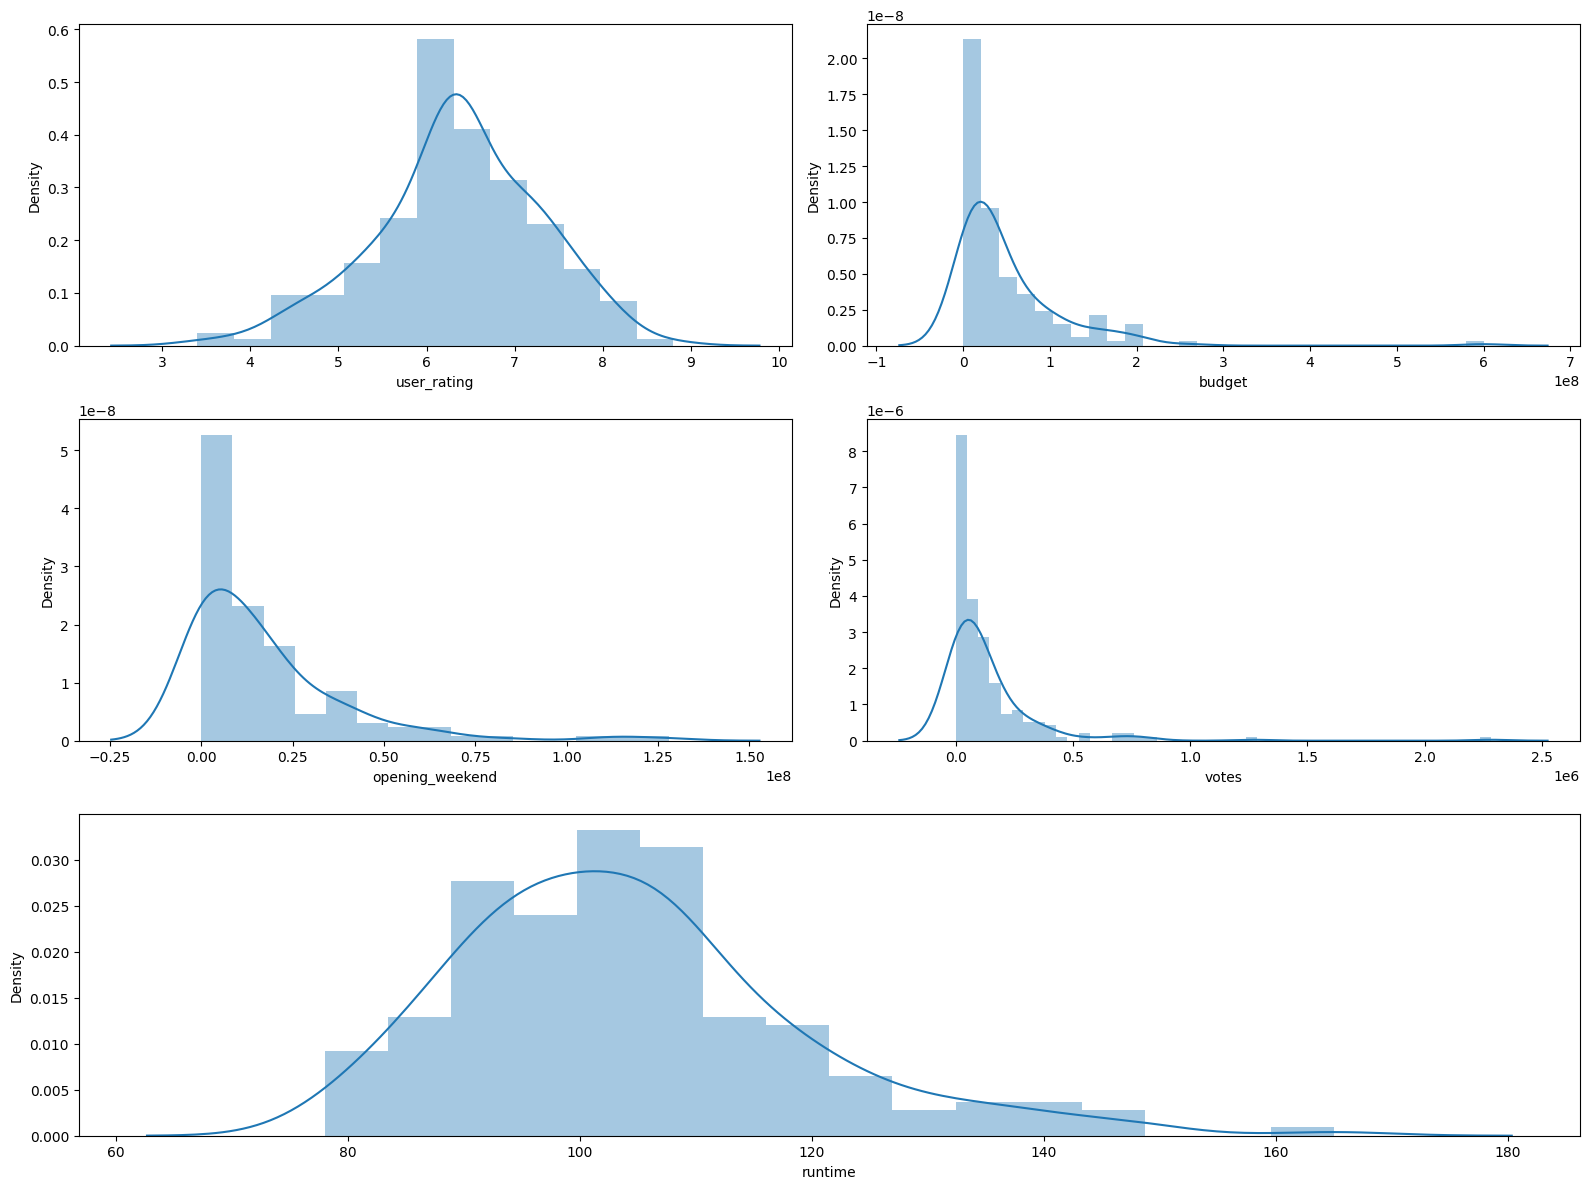

In [26]:
# OBSERVE DATASET OUTLIERS

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore")
plt.figure(figsize=(16, 12))

plt.subplot(3, 2, 1)
sns.distplot(unified_view["user_rating"])

plt.subplot(3, 2, 2)
sns.distplot(unified_view["budget"])

plt.subplot(3, 2, 3)
sns.distplot(unified_view["opening_weekend"])

plt.subplot(3, 2, 4)
sns.distplot(unified_view["votes"])

plt.subplot(3, 1, 3)
sns.distplot(unified_view["runtime"])

plt.tight_layout()

plt.show()


NOTES:

Outlier checks for gross sales and budget removed movies i thought were important to the dataset.

In [27]:
# DEFINE OUTLIERS FOR RUNTIME

upper_limit = unified_view["runtime"].mean() + 3 * unified_view["runtime"].std()
lower_limit = unified_view["runtime"].mean() - 3 * unified_view["runtime"].std()

print(f"Upper Limit: {upper_limit}")
print(f"Lower Limit: {lower_limit}")


Upper Limit: 148.2384197496562
Lower Limit: 59.952535024213134


In [28]:

above_upper_limit = unified_view[unified_view["runtime"] > upper_limit]
below_lower_limit = unified_view[unified_view["runtime"] < lower_limit]

In [29]:
above_upper_limit.head()

,_id_x,title,runtime,user_rating,votes,budget,opening_weekend,gross_sales,release_date_x,genres,...,movie_day_x,_id_y,movie_id,release_date_y,description,score,thumbnail,movie_year_y,movie_month_y,movie_day_y
21,652df3fee11765e61cda3ea8,My Name Is Khan,165,7.9,105720,12000000.0,NaN,42345360.0,2010-02-11,"[Drama, Romance]",...,11,6526478907cbae86fea14390,15939,2010-02-12 08:00:00,"Rizvan Khan, a Muslim man from India, moves to...",50,https://static.metacritic.com/images/products/...,2010,2,12


In [30]:
below_lower_limit.head()

,_id_x,title,runtime,user_rating,votes,budget,opening_weekend,gross_sales,release_date_x,genres,...,movie_day_x,_id_y,movie_id,release_date_y,description,score,thumbnail,movie_year_y,movie_month_y,movie_day_y


In [31]:
import pandas as pd

# CREARE NEW DATAFRAME WITHOUT OUTLIERS

unified_no_outliers = unified_view[(unified_view["runtime"] >= lower_limit) & (unified_view["runtime"] <= upper_limit)]

# VIEW OUTLIER INFO

unified_no_outliers["runtime"].describe()

count    198.000000
mean     103.787879
std       14.095593
min       78.000000
25%       94.000000
50%      102.500000
75%      110.000000
max      148.000000
Name: runtime, dtype: float64

In [32]:
#  COMPARE TO ORIGINAL

unified_view["runtime"].describe()

count    199.000000
mean     104.095477
std       14.714314
min       78.000000
25%       94.000000
50%      103.000000
75%      110.000000
max      165.000000
Name: runtime, dtype: float64

In [33]:
# RUN REGRESSION MODEL ON NEW DATASET

import statsmodels.formula.api

ols_model_clean = statsmodels.formula.api.ols(
    formula="gross_sales ~ user_rating + budget + opening_weekend + votes + runtime",
    data=unified_no_outliers).fit()
print(ols_model_clean.summary())


                            OLS Regression Results                            
Dep. Variable:            gross_sales   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     103.9
Date:                Sun, 12 Nov 2023   Prob (F-statistic):           1.09e-34
Time:                        20:50:29   Log-Likelihood:                -1785.4
No. Observations:                  91   AIC:                             3583.
Df Residuals:                      85   BIC:                             3598.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.651e+07   9.09e+07     

In [34]:
# COMPARE TO ORIGINAL

ols_model_original = statsmodels.formula.api.ols(
    formula="gross_sales ~ user_rating + budget + opening_weekend + votes + runtime",
    data=unified_view).fit()
print(ols_model_original.summary())

                            OLS Regression Results                            
Dep. Variable:            gross_sales   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     103.9
Date:                Sun, 12 Nov 2023   Prob (F-statistic):           1.09e-34
Time:                        20:50:29   Log-Likelihood:                -1785.4
No. Observations:                  91   AIC:                             3583.
Df Residuals:                      85   BIC:                             3598.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.651e+07   9.09e+07     

MODEL ANALYSIS:

- Our model is able to explain 85.9% of the variability in our data.
- Runtime and user_rating doesnt seem to be a good predictor for gross_sales in our model.
- Removing user_rating and runtime and adding other variables may present a stronger model.

In [35]:
# CREATE SENTIMENT MODEL USING AI

import transformers

MODEL = "cardiffnlp/twitter-roberta-base-sentiment"
sentiment_task = transformers.pipeline("sentiment-analysis", model=MODEL,
    tokenizer=transformers.AutoTokenizer.from_pretrained(MODEL))

print(sentiment_task("Covid is fake!"))

print(sentiment_task("I really love icecream on a warm day!"))

print(sentiment_task("The book Moby Dick was written by Herman Melville."))
                                       


All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


[{'label': 'LABEL_0', 'score': 0.8936184048652649}]
[{'label': 'LABEL_2', 'score': 0.9906572103500366}]
[{'label': 'LABEL_1', 'score': 0.8153434991836548}]


In [36]:
# CALCULATE SENTIMENT SCORES

def calculate_sentiment(text):
    if text is None:
        return 0
    sentiment = sentiment_task(text)
    if sentiment[0]['label'] == 'LABEL_0':
        return 0 - sentiment[0]['score'] - 0.5
    elif sentiment[0]['label'] == 'LABEL_1':
        return sentiment[0]['score'] - 0.5
    elif sentiment[0]['label'] == 'LABEL_2':
        return 1 + sentiment[0]['score'] - 0.5
    
print(calculate_sentiment("Professor spence is super cool"))
print(calculate_sentiment("I hate turtles"))
print(calculate_sentiment("Clouds drifted across the sky as the sun set behind the mountains."))
print(calculate_sentiment(None))

1.484057366847992
-1.4639295935630798
0.32559239864349365
0


In [37]:
# ADD SENTIMEMNT COLUMN

sentiment_column = unified_no_outliers.apply(lambda row : calculate_sentiment(row.get('description')), axis = 1)

unified_no_outliers["sentiment"] = sentiment_column

unified_no_outliers.head()

,_id_x,title,runtime,user_rating,votes,budget,opening_weekend,gross_sales,release_date_x,genres,...,_id_y,movie_id,release_date_y,description,score,thumbnail,movie_year_y,movie_month_y,movie_day_y,sentiment
0,652df3fee11765e61cda3e0e,Inception,148,8.8,2282266,160000000.0,62785337.0,825532764.0,2010-07-08,"[Action, Adventure, Sci-Fi, Thriller]",...,6526478907cbae86fea142ae,15713,2010-07-16 07:00:00,"Dom Cobb is a skilled thief, the absolute best...",74,https://static.metacritic.com/images/products/...,2010,7,16,-0.962199
1,652df3fee11765e61cda3e15,The Social Network,120,7.8,686673,40000000.0,22445653.0,224920315.0,2010-09-24,"[Biography, Drama]",...,6526478907cbae86fea14264,15639,2010-10-01 07:00:00,"On a fall night in 2003, Harvard undergrad and...",95,https://static.metacritic.com/images/products/...,2010,10,1,1.360346
2,652df3fee11765e61cda3e21,Black Swan,108,8.0,749660,13000000.0,1443809.0,329398046.0,2010-09-01,"[Drama, Thriller]",...,6526478907cbae86fea1428f,15682,2010-12-03 08:00:00,Black Swan is a psychological thriller set in ...,79,https://static.metacritic.com/images/products/...,2010,12,3,0.292558
3,652df3fee11765e61cda3e35,Iron Man 2,124,6.9,797421,200000000.0,128122480.0,623933331.0,2010-04-26,"[Action, Adventure, Sci-Fi]",...,6526478907cbae86fea1434f,15874,2010-05-07 07:00:00,"In Iron Man 2, the world is aware that billion...",57,https://static.metacritic.com/images/products/...,2010,5,7,0.151578
4,652df3fee11765e61cda3e39,The Losers,97,6.3,100516,25000000.0,9406348.0,NaN,2010-04-20,"[Action, Adventure, Crime, Mystery, Thriller]",...,6526478907cbae86fea143be,15985,2010-04-23 07:00:00,"An explosive tale of double cross and revenge,...",44,https://static.metacritic.com/images/products/...,2010,4,23,0.114323


In [39]:
# REGRESSION MODEL WITH SENTIMENT

import statsmodels.formula.api

ols_model_clean = statsmodels.formula.api.ols(
    formula="gross_sales ~ sentiment + budget + opening_weekend + votes",
    data=unified_no_outliers).fit()
print(ols_model_clean.summary())

                            OLS Regression Results                            
Dep. Variable:            gross_sales   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     126.6
Date:                Sun, 12 Nov 2023   Prob (F-statistic):           3.43e-35
Time:                        21:03:40   Log-Likelihood:                -1786.8
No. Observations:                  91   AIC:                             3584.
Df Residuals:                      86   BIC:                             3596.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -3.101e+07   1.41e+07     

MODEL ANALYSIS:

- Removed runtime, user_rating, and added sentiment, no significant improvement to model.
- Sentiment as constructed not a good predictor for gross_sales

In [87]:
# ADD COLUMN FOR SENTIMENT CATEGORY

def categorize_sentiment(score):
    if score < -0.5:
        return 'Negative'
    elif -0.5 <= score < 0.5:
        return 'Neutral'
    else:
        return 'Positive'

unified_no_outliers['sentiment_category'] = unified_no_outliers['sentiment'].apply(categorize_sentiment)

unified_no_outliers.head()


,_id_x,title,runtime,user_rating,votes,budget,opening_weekend,gross_sales,release_date_x,genres,...,movie_id,release_date_y,description,score,thumbnail,movie_year_y,movie_month_y,movie_day_y,sentiment,sentiment_category
0,652df3fee11765e61cda3e0e,Inception,148,8.8,2282266,160000000.0,62785337.0,825532764.0,2010-07-08,"[Action, Adventure, Sci-Fi, Thriller]",...,15713,2010-07-16 07:00:00,"Dom Cobb is a skilled thief, the absolute best...",74,https://static.metacritic.com/images/products/...,2010,7,16,-0.962199,Negative
1,652df3fee11765e61cda3e15,The Social Network,120,7.8,686673,40000000.0,22445653.0,224920315.0,2010-09-24,"[Biography, Drama]",...,15639,2010-10-01 07:00:00,"On a fall night in 2003, Harvard undergrad and...",95,https://static.metacritic.com/images/products/...,2010,10,1,1.360346,Positive
2,652df3fee11765e61cda3e21,Black Swan,108,8.0,749660,13000000.0,1443809.0,329398046.0,2010-09-01,"[Drama, Thriller]",...,15682,2010-12-03 08:00:00,Black Swan is a psychological thriller set in ...,79,https://static.metacritic.com/images/products/...,2010,12,3,0.292558,Neutral
3,652df3fee11765e61cda3e35,Iron Man 2,124,6.9,797421,200000000.0,128122480.0,623933331.0,2010-04-26,"[Action, Adventure, Sci-Fi]",...,15874,2010-05-07 07:00:00,"In Iron Man 2, the world is aware that billion...",57,https://static.metacritic.com/images/products/...,2010,5,7,0.151578,Neutral
4,652df3fee11765e61cda3e39,The Losers,97,6.3,100516,25000000.0,9406348.0,NaN,2010-04-20,"[Action, Adventure, Crime, Mystery, Thriller]",...,15985,2010-04-23 07:00:00,"An explosive tale of double cross and revenge,...",44,https://static.metacritic.com/images/products/...,2010,4,23,0.114323,Neutral


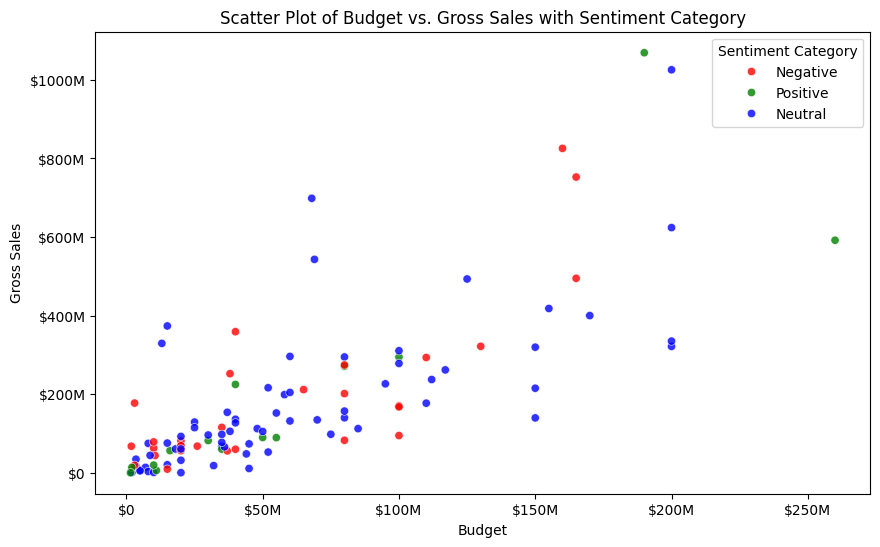

In [91]:
# SCATTER PLOT OF BUDGET VS. GROSS SALES WITH SENTIMENT CATEGORY

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# define formater for currency

def format_currency(amount, _):
    if amount > 1_000_000_000_000:
        return f"${round(amount / 1_000_000_000_000)}T"
    elif amount > 1_000_000_000:
        return f"${round(amount / 1_000_000_000)}B"
    elif amount > 1_000_000:
        return f"${round(amount / 1_000_000)}M"
    elif amount > 1_000:
        return f"${round(amount / 1_000)}K"
    else:
        return f"${round(amount)}"

x = 'budget'
y = 'gross_sales'
hue = 'sentiment_category'

# Set colow for each Sentiment Category

color_mapping = {'Negative': 'red', 'Neutral': 'blue', 'Positive': 'green'}

plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=unified_no_outliers, x=x, y=y, hue=hue, palette=color_mapping, alpha=0.8)

# Set currency formatter
scatter.xaxis.set_major_formatter(FuncFormatter(format_currency))
scatter.yaxis.set_major_formatter(FuncFormatter(format_currency))

plt.title(f'Scatter Plot of Budget vs. Gross Sales with Sentiment Category')
plt.xlabel("Budget")
plt.ylabel("Gross Sales")
plt.legend(title='Sentiment Category')
plt.show()


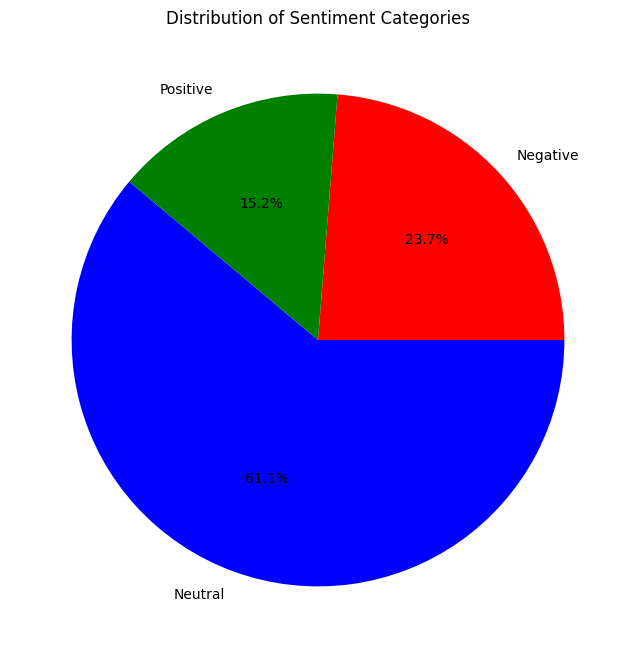

In [92]:
# DISTRIBUTION OF SENTIMENT USING GOOD'OL PIECHART

import matplotlib.pyplot as plt


sentiment_counts = unified_no_outliers['sentiment_category'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=['blue', 'red', 'green'])
plt.title('Distribution of Sentiment Categories')
plt.show()



CHART ANALYSIS:

From the scatterplot, it would seem that  negative sentiment movies dominated in year 2010. However, viewing the piechart gives a better view showing Neutral Sentiment (61.1%) movies as the leader for that year, followed by Negative Sentiment (23.7%), and Positive sentiment (15.2%) in last place.

Additionally when viewing the dataset directly to discern the accuracy of the chart, I observed that certain movies categorized as Neutral could've been either Positive or Negative (see table below). A couple of examples are Black Swan, which can be categorized as Negative Sentiment based on my personal recollection of the movie. To avoid personal bias, I read reviews from a couple of sites. See below for snippets from the review:

--
By: Chris Lambert

"The signs of extreme mental illness, like with everything else in this movie, build up over time. We know Nina’s mother is overbearing and representative of an over-involved, over-protective type of never-had-success dancers who obsess over their daughter’s careers. But that’s not the sole reason the mother babies Nina. It’s hinted at, then told to us, that Nina has had psychological issues in the past. These mostly had to do with scratching and other means of self-mutilation." 

https://filmcolossus.com/black-swan-movie-explained/


--
By: Peter Bradshaw

Title: Black Swan review – gripping ballet psychodrama about fear, love and hatred

https://www.theguardian.com/film/2011/jan/20/black-swan-review




In [82]:
neutral_reviews = review_table[review_table["sentiment_category"] == "Neutral"]

neutral_reviews.head(100)


,title,sentiment_category
2,Black Swan,Neutral
3,Iron Man 2,Neutral
4,The Losers,Neutral
5,Blue Valentine,Neutral
6,The American,Neutral
...,...,...
158,Extraordinary Measures,Neutral
160,Stone,Neutral
161,The Tempest,Neutral
162,Cats & Dogs: The Revenge of Kitty Galore,Neutral


METACRITIC PIPELINE AND TRANSFORMAITON

```
[
    {
        '$project': {
            'movie_id': '$movie_id', 
            'title': '$title', 
            'release_date': {
                '$convert': {
                    'input': '$release_date', 
                    'to': 'date', 
                    'onError': None
                }
            }, 
            'description': '$description', 
            'score': {
                '$convert': {
                    'input': '$score', 
                    'to': 'int', 
                    'onError': None
                }
            }, 
            'thumbnail': '$thumbnail'
        }
    }, {
        '$addFields': {
            'movie_year': {
                '$year': '$release_date'
            }, 
            'movie_month': {
                '$month': '$release_date'
            }, 
            'movie_day': {
                '$dayOfMonth': '$release_date'
            }
        }
    }
]
```